# News classification model using Naive Bayes Classification method

In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups() 
categories = data.target_names
categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [41]:
#training the data on these categories
train=fetch_20newsgroups(subset='train',categories=categories)
#testing the data on these categories
test=fetch_20newsgroups(subset='test',categories=categories)
#printing the  training data value at 5th position data 

print(test.data[5])
#printing the length of the training data
print(len(train.data))

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer #<-- these weights different words in the document based on many features like from,crime etc as per the appearence
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline #<--these is used for information transfer
#creating a model based on multinomial naive bayes
model=make_pipeline(TfidfVectorizer(),MultinomialNB())#<--the information we are getting in TfidfVectorizer is pumped in MultinomialNM() using make_pipeline function

#training the model with the train data
model.fit(train.data,train.target)

#creating the label for test data
labels=model.predict(test.data)


Text(89.133125, 0.5, 'predicted labels')

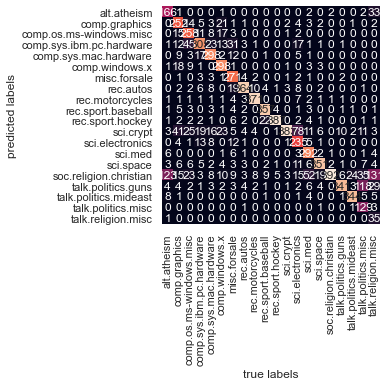

In [43]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
#plotting heatmap of confusion matrix
plt.xlabel("true labels")
plt.ylabel("predicted labels")

In [44]:
#predicting categories on new data based on trained data
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    print(pred)
    return train.target_names[pred[0]]
    
predict_category("i love u")


[15]


'soc.religion.christian'

In [45]:
predict_category('car is better than bus')

[7]


'rec.autos'

In [46]:
predict_category('he is in space for a week ')

[14]


'sci.space'

In [47]:
predict_category('BITS Pilani offers MBA in Business Analytics for working professionals')

[11]


'sci.crypt'

In [48]:
predict_category('Former Raj CM Jagannath Pahadia dies of COVID-19, Gehlot condoles his demise')

[15]


'soc.religion.christian'

In [49]:
predict_category('Delhi on Wednesday recorded a maximum temperature of 23.8 °C, the lowest in the month of May in Delhi since 1951, after rains under the impact of Cyclone Tauktae, IMD said. The temperature was 16 degrees below the normal maximum temperature in the national capital in May. The Safdarjung Observatory recorded 31.3 mm rainfall between 8:30am and 5:30pm, IMD said') 

[14]


'sci.space'

In [50]:
predict_category("We'll permit door-to-door COVID-19 vaccination if Centre does not: Bombay HC")

[11]


'sci.crypt'

In [51]:
predict_category("Facebook, Twitter told to carry correction notice on 'Singapore COVID-19 variant'")

[16]


'talk.politics.guns'

In [52]:
predict_category("Will be in position to vaccinate all adults in India by end of year: Govt")

[15]


'soc.religion.christian'

In [53]:
predict_category("Home testing kit for COVID-19 by Mylab gets ICMR approval")

[7]


'rec.autos'

In [54]:
predict_category("Advisory for COVID-19 home testing using Rapid Antigen Tests issued by ICMR")

[13]


'sci.med'

In [55]:
predict_category("Ex-NSG chief JK Dutt, who led 26/11 Mumbai counter-terror operation, dies of COVID-19")

[15]


'soc.religion.christian'

In [56]:
predict_category("PM mistakenly says 'COVID-19 cases should increase rapidly' during meet with DMs")

[16]


'talk.politics.guns'

In [57]:
predict_category("ByteDance Co-founder to step down as CEO by 2021-end, says he's not an 'ideal manager'")

[15]


'soc.religion.christian'

In [58]:
predict_category("Mamata Banerjee, TMC leaders obstructing probe in Narada case: CBI")

[7]


'rec.autos'

In [59]:
predict_category("Rockets fired at Israel from Lebanon, Israel strikes targets in Lebanon in response")

[17]


'talk.politics.mideast'

In [60]:
predict_category("Cyclist falls off bike while taking selfie in US; caught on live news")

[8]


'rec.motorcycles'

In [61]:
predict_category("After my 2nd delivery, I gained lot of weight: Shweta on transformation")

[13]


'sci.med'

In [62]:
predict_category("Indian Army develops system to convert liquid oxygen to oxygen gas")

[14]


'sci.space'

In [63]:
predict_category("NSUI files FIR against Sambit Patra, Raman Singh in toolkit case")

[5]


'comp.windows.x'

In [64]:
predict_category("Coimbatore temple consecrates 'Corona Devi' idol amid COVID surge")

[15]


'soc.religion.christian'

In [65]:
predict_category('''The Bill & Melinda Gates Foundation said it's not investigating allegations against Microsoft Co-founder Bill Gates as they were made by "an anonymous former employee". In a statement to AP, the foundation's spokesperson said, "We never received any formal complaints regarding Bill Gates." Earlier, the NYT reported Gates had asked women employees out for dates while married to Melinda Gates.''')

[15]


'soc.religion.christian'

In [66]:
predict_category('''We believe cryptocurrencies are viable investment asset: Wells Fargo''')

[17]


'talk.politics.mideast'

In [67]:
predict_category('''Over 100 unexploded World War II bombs found in Solomon Islands''')

[17]


'talk.politics.mideast'

In [68]:
# ---------------------------------------------------------------

In [69]:
predict_category('''Determined to continue Gaza operation until aim met: Israeli PM
''')

[17]


'talk.politics.mideast'

In [70]:
predict_category('''SEBI fines Biocon, ex-official ₹14 lakh for violating market norms''')

[11]


'sci.crypt'

In [73]:

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

data=fetch_20newsgroups()
categories=data.target_names

train=fetch_20newsgroups(subset='train',categories=categories)
test=fetch_20newsgroups(subset='test',categories=categories)

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline 

model=make_pipeline(TfidfVectorizer(),MultinomialNB()) 
model.fit(train.data,train.target)
labels=model.predict(test.data)

from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,labels)

def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    print(pred)
    return train.target_names[pred[0]]

predict_category('''
Determined to continue Gaza operation until aim met: Israeli PM
''') 

[17]


'talk.politics.mideast'